In [3]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, f1_score
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_recall_curve
import imageio.v2 as imageio
import random

# Details of make_classification function
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html



# 실습 1 : TPR과 FPR로 그려진 AUROC


In [4]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1000)

In [5]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=1000)

print('trainy - class0: ', len(trainy)-trainy.sum())
print('trainy - class1: ', trainy.sum())
print('----------------------')
print('testy - class0: ', len(testy)-testy.sum())
print('testy - class1: ', testy.sum())
print('============================')

# make testing dataset balance
undersample = RandomUnderSampler(sampling_strategy='majority')
testX, testy = undersample.fit_resample(testX, testy)

print('Balanced Testing date')
print('testy - class0: ', len(testy)-testy.sum())
print('testy - class1: ', testy.sum())

trainy - class0:  253
trainy - class1:  247
----------------------
testy - class0:  249
testy - class1:  251
Balanced Testing date
testy - class0:  249
testy - class1:  249


In [6]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

nth 0:positive: 249 negative: 249
---------------------------------------------
nth 1:positive: 225 negative: 249
---------------------------------------------
nth 2:positive: 200 negative: 249
---------------------------------------------
nth 3:positive: 175 negative: 249
---------------------------------------------
nth 4:positive: 150 negative: 249
---------------------------------------------
nth 5:positive: 125 negative: 249
---------------------------------------------
nth 6:positive: 100 negative: 249
---------------------------------------------
nth 7:positive: 75 negative: 249
---------------------------------------------
nth 8:positive: 50 negative: 249
---------------------------------------------
nth 9:positive: 25 negative: 249
---------------------------------------------


Text(0.5, 1.0, 'decreasing positive sample')

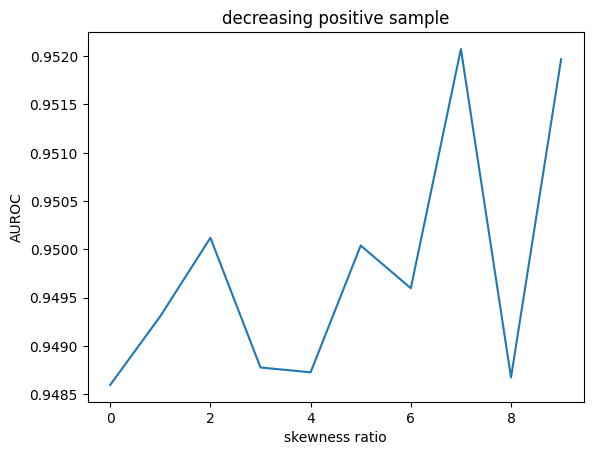

In [7]:
# repeat with different skewness
roc_list = []
lr_acc = []
k=1
for i in range(0, 10):
  pos_ind = np.where(testy==1)[0]
  n = int(i/10 * len(pos_ind))
  tmp_testX, tmp_testy = np.copy(testX), np.copy(testy)
  tmp_testX = np.delete(tmp_testX, pos_ind[:n], axis=0)
  tmp_testy = np.delete(tmp_testy, pos_ind[:n], axis=0)
  print('nth %d:positive: %d negative: %d'
        % (i, tmp_testy.sum(), tmp_testy.shape[0] - tmp_testy.sum()))
  print('---------------------------------------------')

  # predict probabilities
  lr_probs = model.predict_proba(tmp_testX)
  # keep probabilities for the positive outcome only
  lr_probs = lr_probs[:, 1]
  # calculate scores
  lr_auc = roc_auc_score(tmp_testy, lr_probs)

  # summarize scores
  # print('iteration %d: Logistic: ROC AUC=%.3f' % (k, lr_auc))
  k += 1
  # calculate roc curves
  lr_fpr, lr_tpr, _ = roc_curve(tmp_testy, lr_probs)
  roc_list.append(lr_auc)

plt.plot(np.arange(0, len(roc_list)), roc_list)
plt.xlabel('skewness ratio')
plt.ylabel('AUROC')
plt.title('decreasing positive sample')


## 질문 1: 데이터 불균형이 심해지는데 AUROC 평가 지표는 왜 높게 형성이 될까요?

## 답변 1
- AUROC는 TPR과 FPR을 사용하며, 이 두 지표는 각각의 클래스 내에서만 정규화된다.
즉 TPR과 FPR은 각각 **실제 양성** 및 **실제 음성** 데이터에 대해서만 계산된다.
    - TPR = TP / TP + FN (실제 양성 중 올바르게 예측한 비율)
    - FPR = FP /  FP + TN (실제 음성 중 잘못 예측한 비율)
- 따라서 소수 클래스(양성)의 예측 성능(TPR)이 좋고, 다수 클래스(음성)의 예측 성능 또한 어느 정도 유지된다면, 전체 데이터셋에서 다수 클래스가 압도적으로 많더라도 AUROC 값은 높게 나오게 된다.

# 실습 2 : Precision, Recall, F1 Score의 이해


In [8]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1000)

In [9]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=1000)

print('trainy - class0: ', len(trainy)-trainy.sum())
print('trainy - class1: ', trainy.sum())
print('----------------------')
print('testy - class0: ', len(testy)-testy.sum())
print('testy - class1: ', testy.sum())
print('============================')

# make testing dataset balance
undersample = RandomUnderSampler(sampling_strategy='majority')
testX, testy = undersample.fit_resample(testX, testy)

print('Balanced Testing date')
print('testy - class0: ', len(testy)-testy.sum())
print('testy - class1: ', testy.sum())

trainy - class0:  253
trainy - class1:  247
----------------------
testy - class0:  249
testy - class1:  251
Balanced Testing date
testy - class0:  249
testy - class1:  249


In [10]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

nth 0:positive: 249 negative: 249
---------------------------------------------
nth 1:positive: 225 negative: 249
---------------------------------------------
nth 2:positive: 200 negative: 249
---------------------------------------------
nth 3:positive: 175 negative: 249
---------------------------------------------
nth 4:positive: 150 negative: 249
---------------------------------------------
nth 5:positive: 125 negative: 249
---------------------------------------------
nth 6:positive: 100 negative: 249
---------------------------------------------
nth 7:positive: 75 negative: 249
---------------------------------------------
nth 8:positive: 50 negative: 249
---------------------------------------------
nth 9:positive: 25 negative: 249
---------------------------------------------


Text(0.5, 1.0, 'decreasing positive sample')

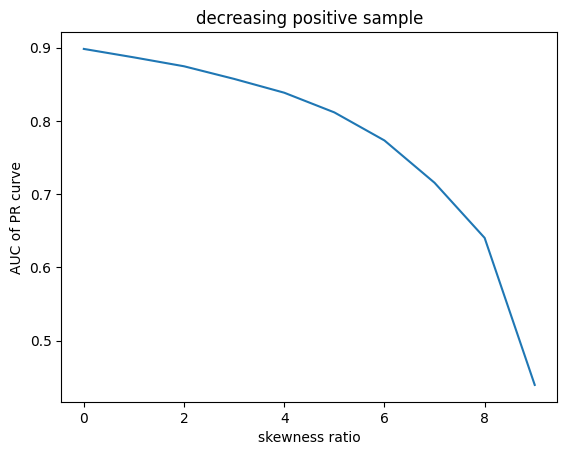

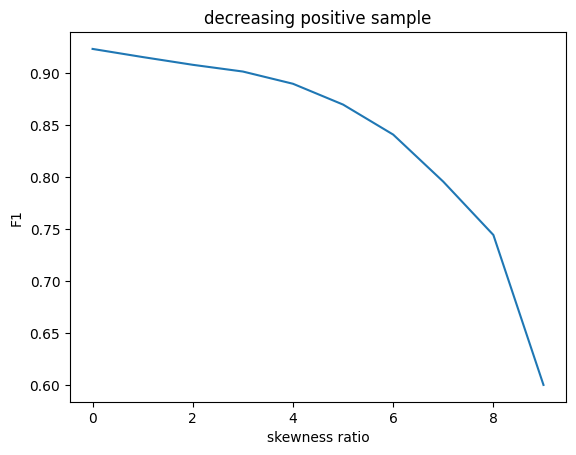

In [11]:
roc_list = []
f1_list = []

k=1
for i in range(0, 10):
  pos_ind = np.where(testy==1)[0]
  n = int(i/10 * len(pos_ind))
  tmp_testX, tmp_testy = np.copy(testX), np.copy(testy)
  tmp_testX = np.delete(tmp_testX, pos_ind[:n], axis=0)
  tmp_testy = np.delete(tmp_testy, pos_ind[:n], axis=0)
  print('nth %d:positive: %d negative: %d'
        % (i, tmp_testy.sum(), tmp_testy.shape[0] - tmp_testy.sum()))
  print('---------------------------------------------')


  # predict probabilities
  lr_probs = model.predict_proba(tmp_testX)
  # keep probabilities for the positive outcome only
  lr_probs = lr_probs[:, 1]
  # predict class values
  yhat = model.predict(tmp_testX)
  # calculate precision and recall for each threshold
  lr_precision, lr_recall, _ = precision_recall_curve(tmp_testy, lr_probs)
  # calculate scores
  lr_f1, lr_auc = f1_score(tmp_testy, yhat), auc(lr_recall, lr_precision)
  # summarize scores
  # print('iteration%d Logistic: f1=%.3f auc=%.3f' % (k, lr_f1, lr_auc))
  k += 1
  roc_list.append(lr_auc)
  f1_list.append(lr_f1)

plt.plot(np.arange(0, len(roc_list)), roc_list)
plt.xlabel('skewness ratio')
plt.ylabel('AUC of PR curve')
plt.title('decreasing positive sample')

plt.figure()
plt.plot(np.arange(0, len(roc_list)), f1_list)
plt.xlabel('skewness ratio')
plt.ylabel('F1')
plt.title('decreasing positive sample')


## 질문 2: AUC, RC Curve와 F1 Curve는 데이터 불균형에 강건한 평가지표인가요? 강건하다면 AUROC보다  강건한 이유를, 그렇지 않다면 강건하지 않은 이유를 설명해주세요.

## 답변 2

- AUROC는 TPR과 FPR를 통해 각 클래스 안에서만 비율을 계산한다. 따라서 데이터 불균형을 반영 하지 못하기 때문에 무관하게 모델의 순위 성능이 높게 평가될 수 있다.
- 하지만 PR Curve 및 F1 Score의 경우 Positive와 Negative 클래스를 함께 계산하는 Precision을 포함한다.
    - Precision = TP / TP+FP
- 따라서 클래스 불균형이 심할수록 FP의 영향이 커져 Precision이 급락하므로
실제 예측 성능을 AUROC보다 정확히 반영하여 PR Curve 및 F1 Score 가 데이터 불균형에 강건한 평가지표이다.



##

# 실습 3 : Convex Function

/tmp/ipython-input-2639115308.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


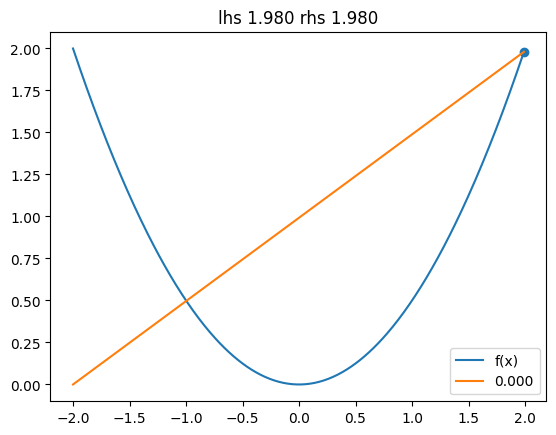

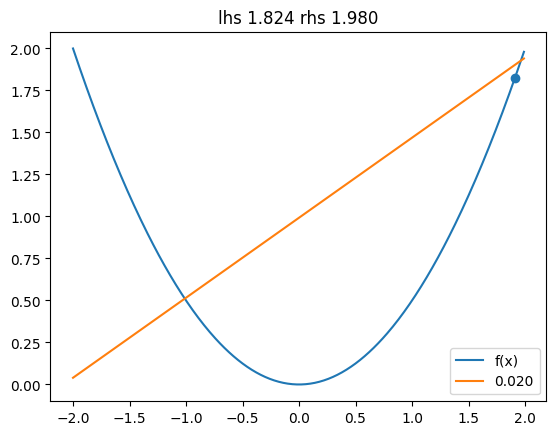

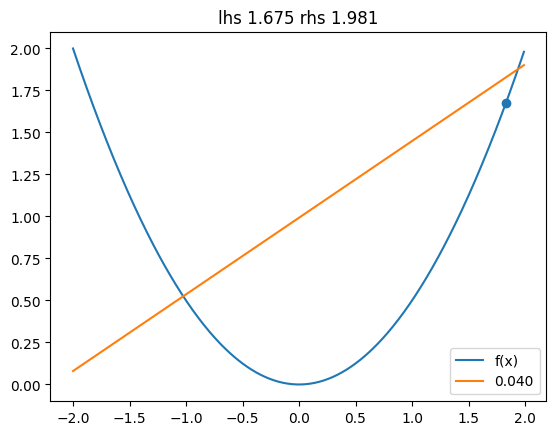

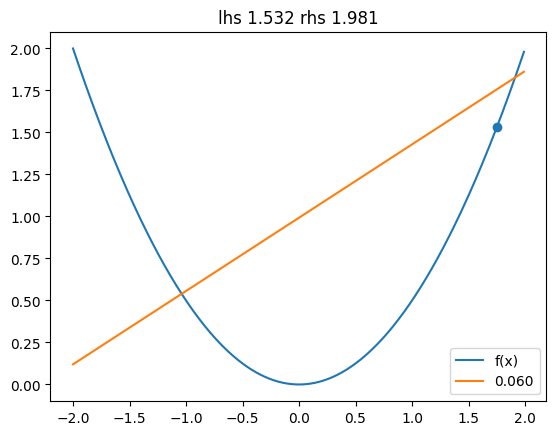

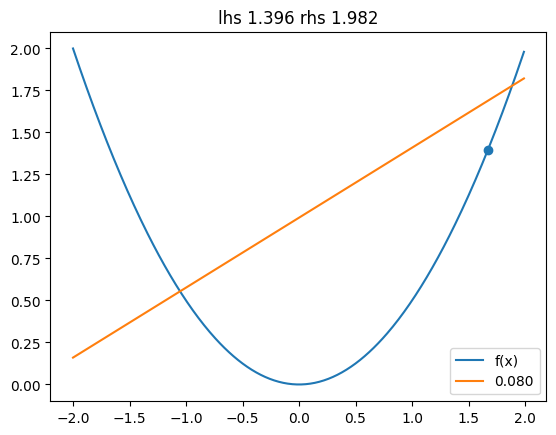

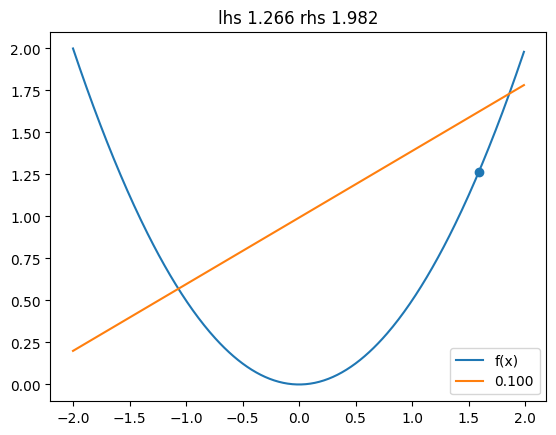

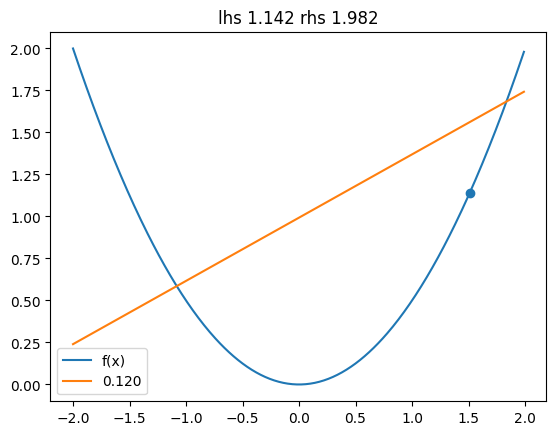

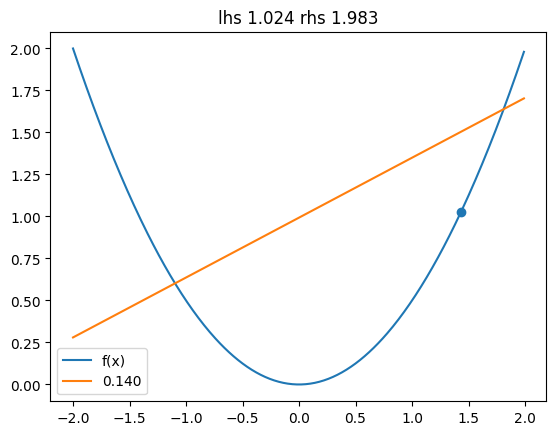

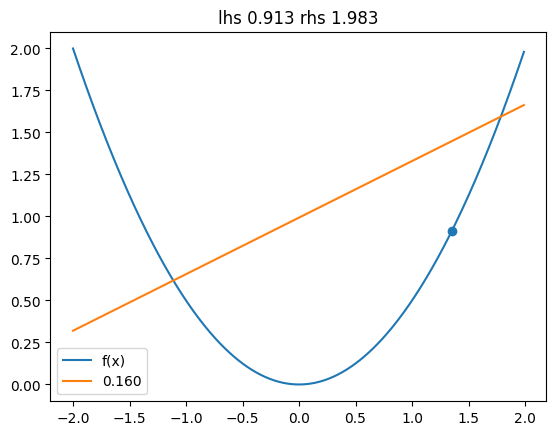

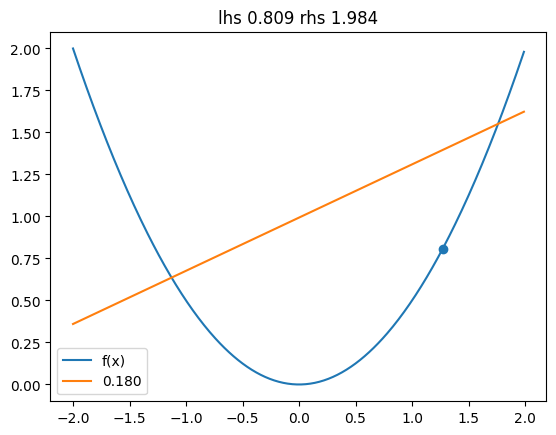

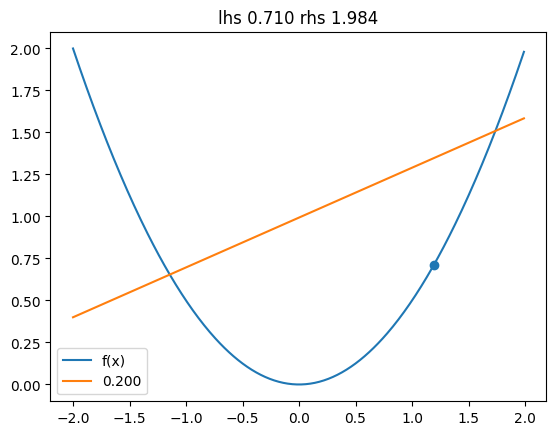

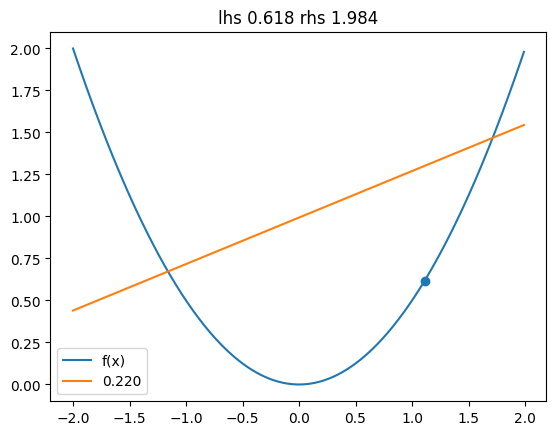

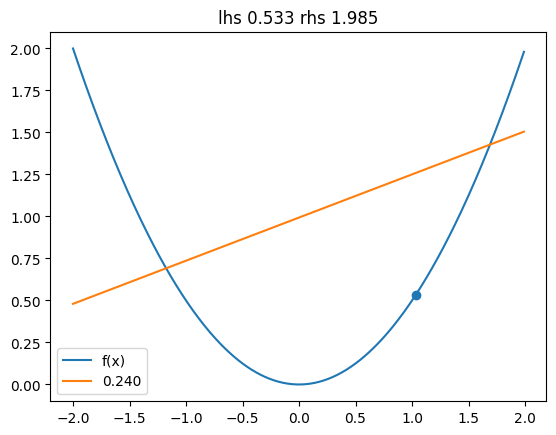

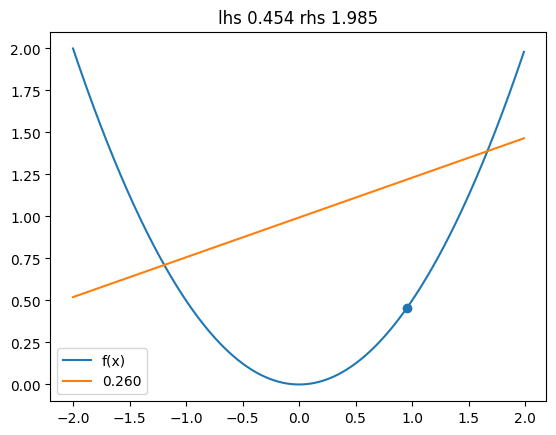

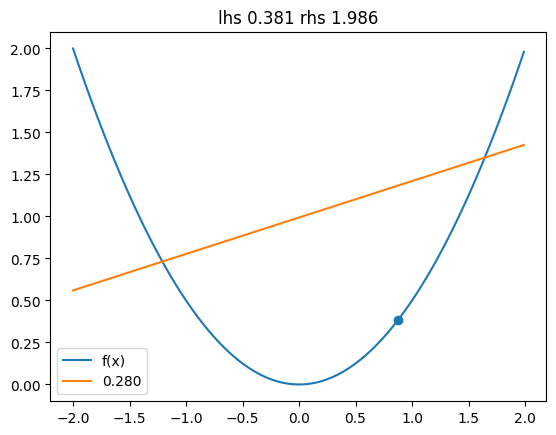

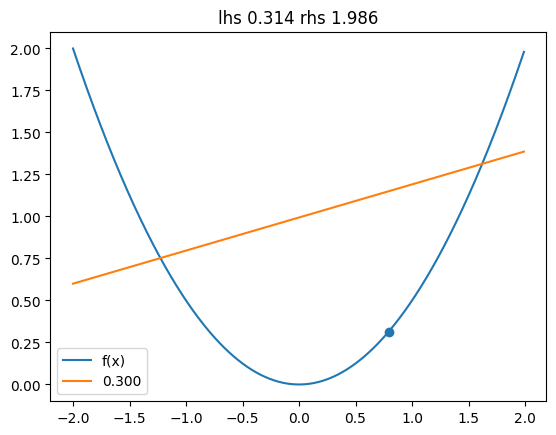

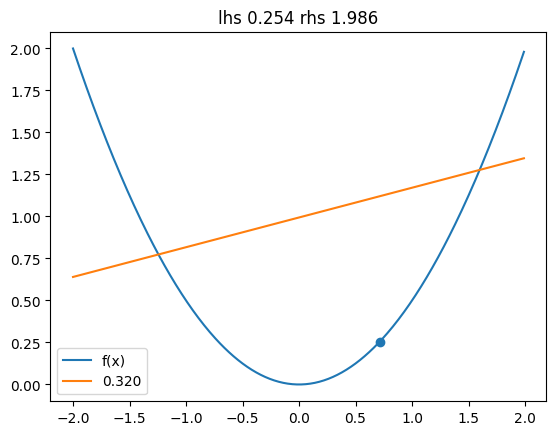

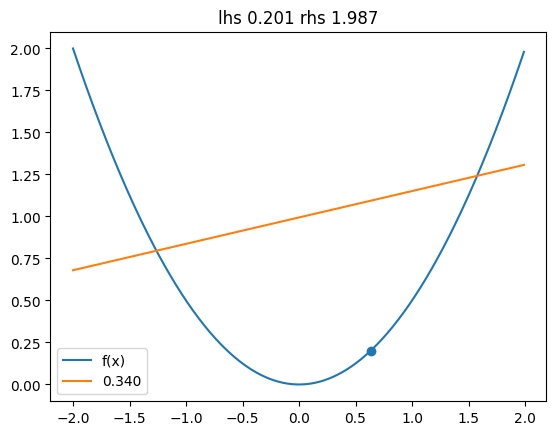

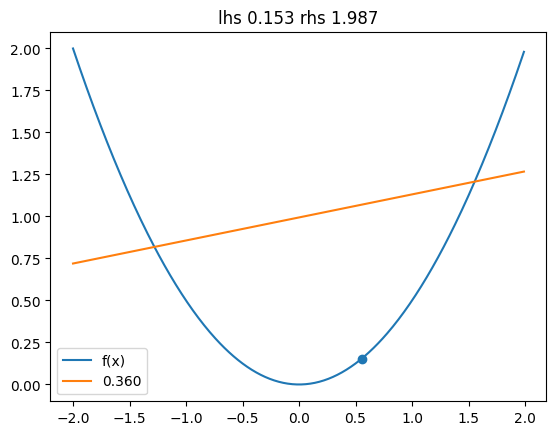

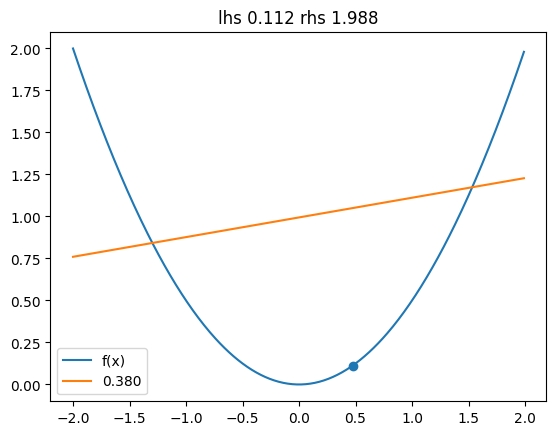

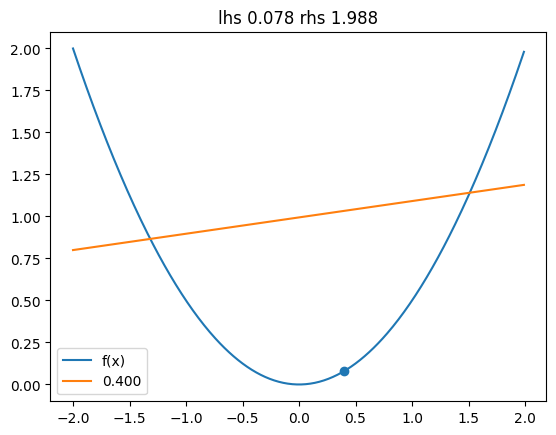

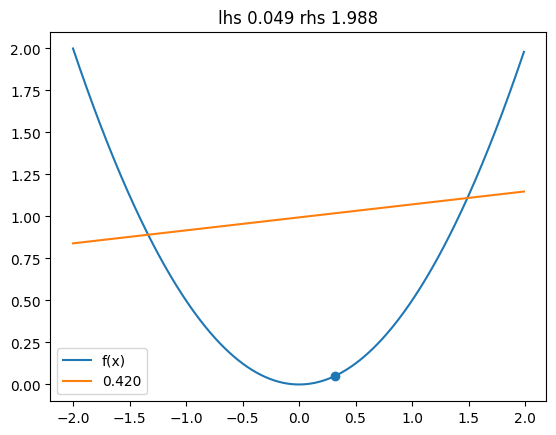

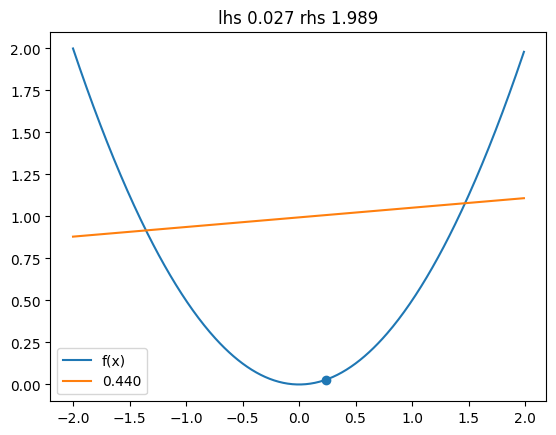

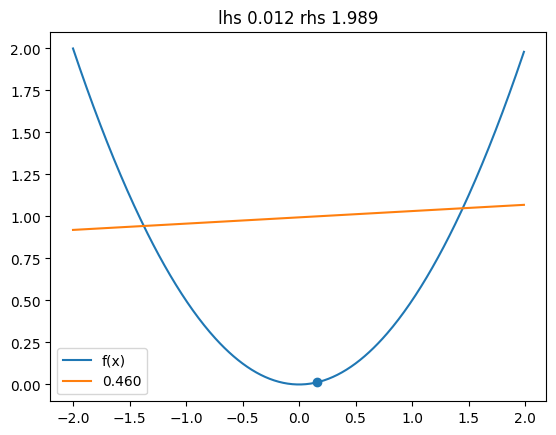

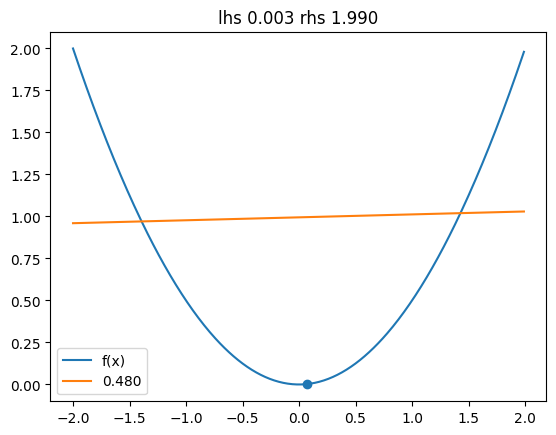

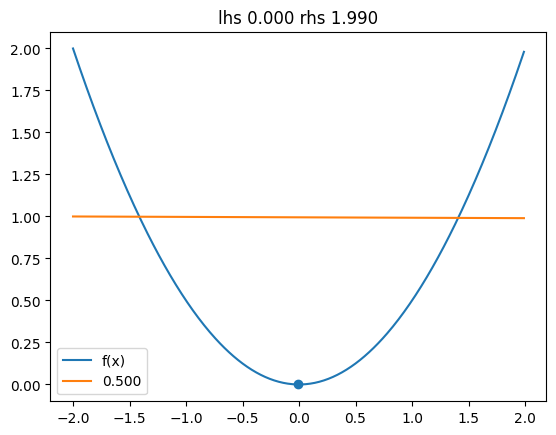

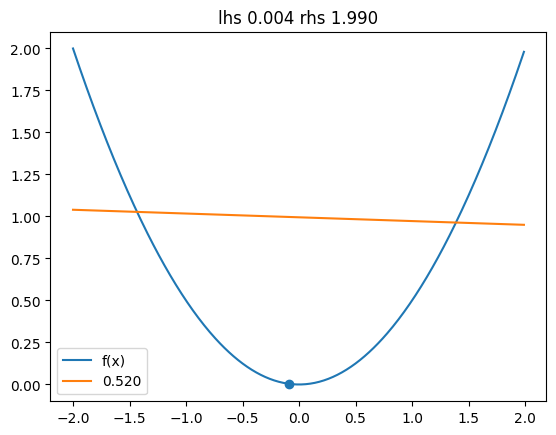

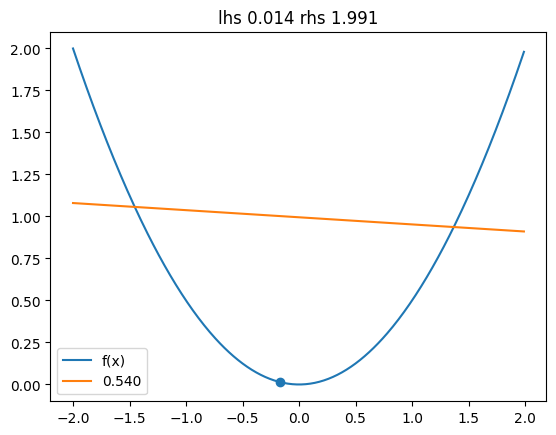

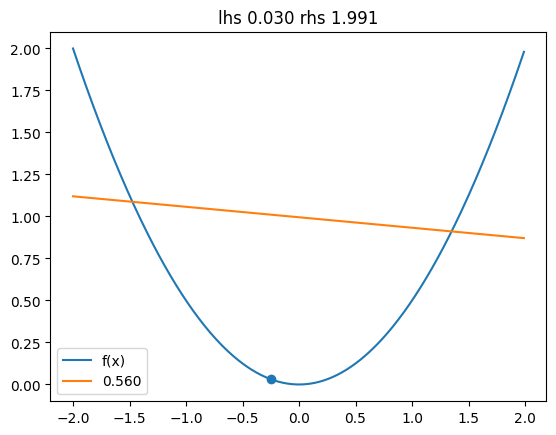

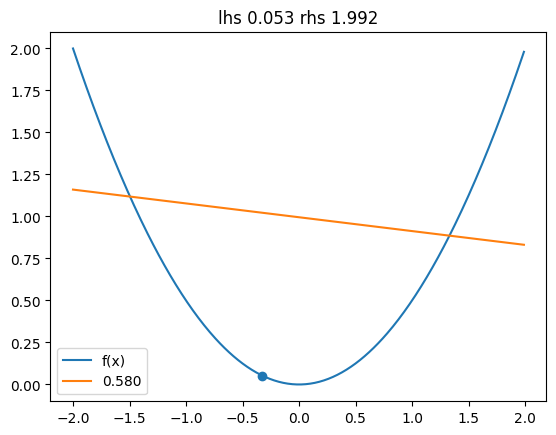

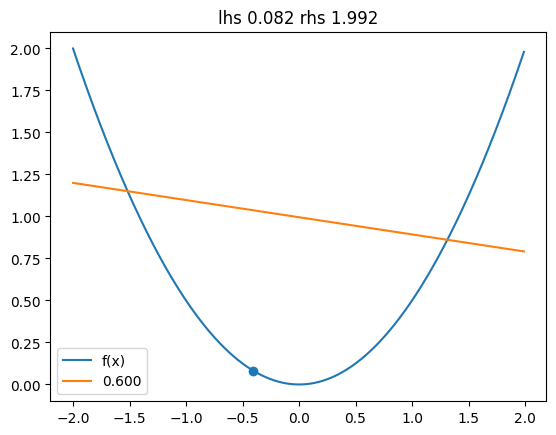

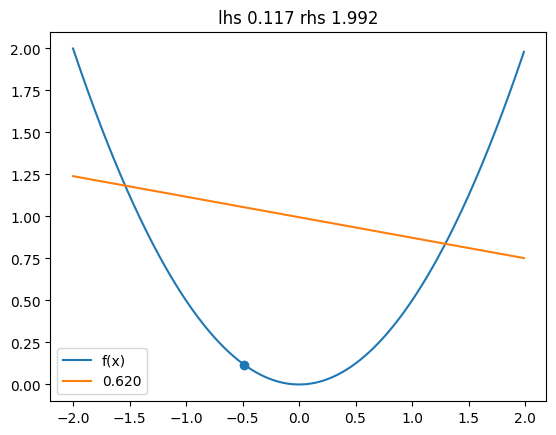

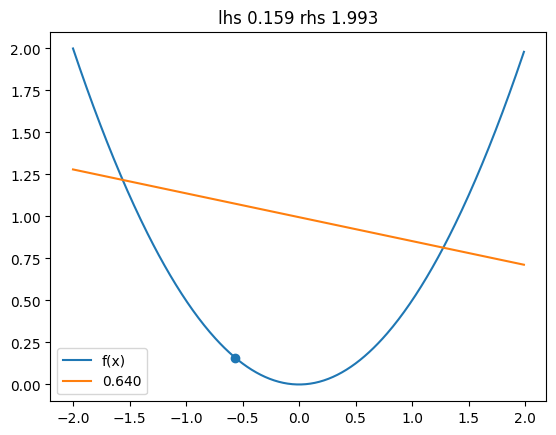

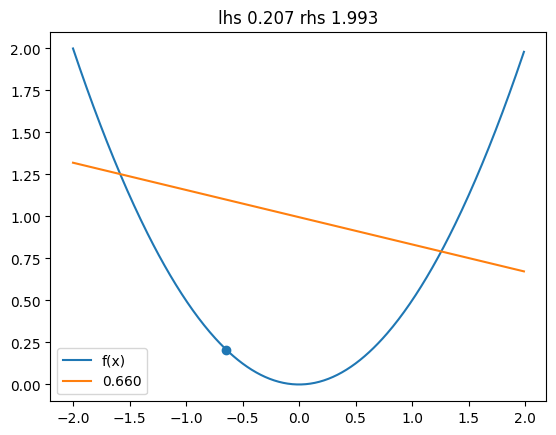

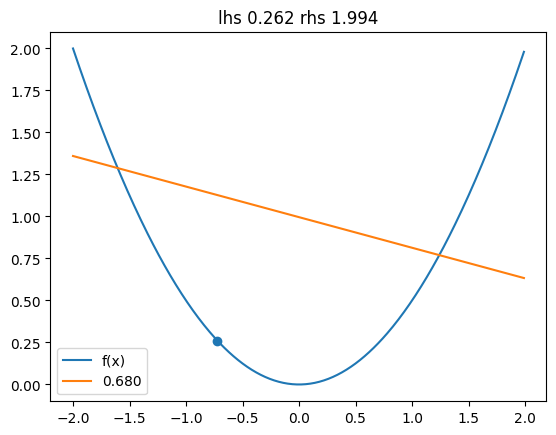

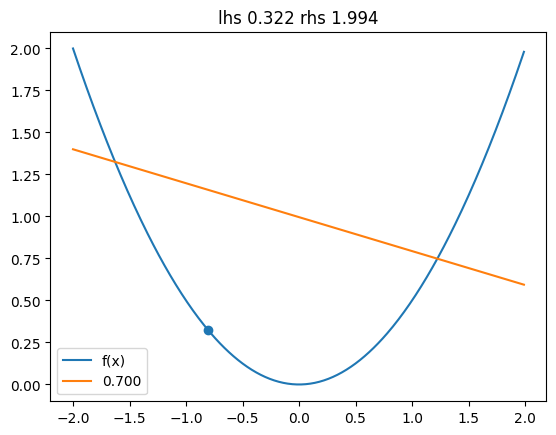

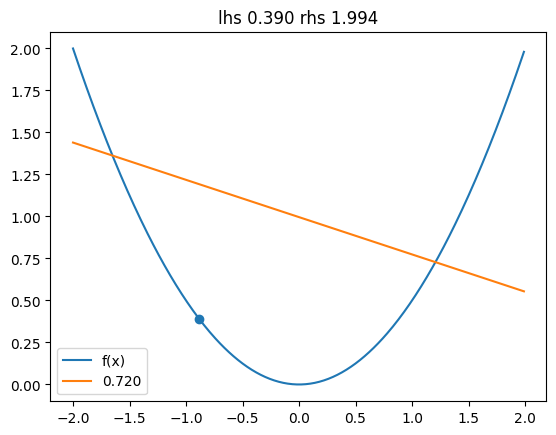

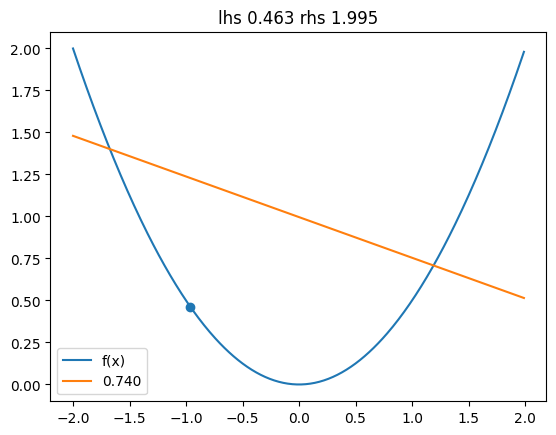

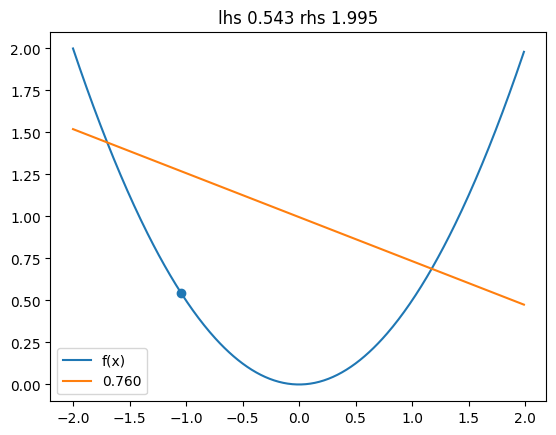

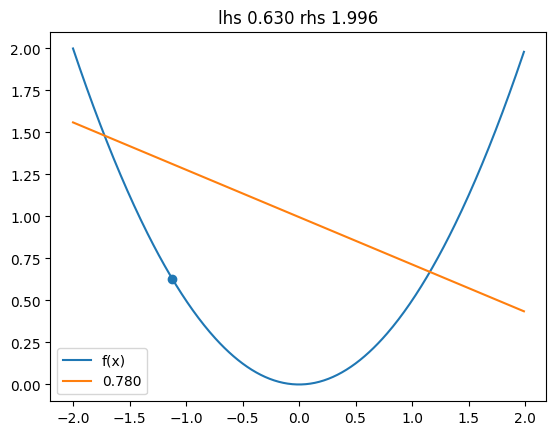

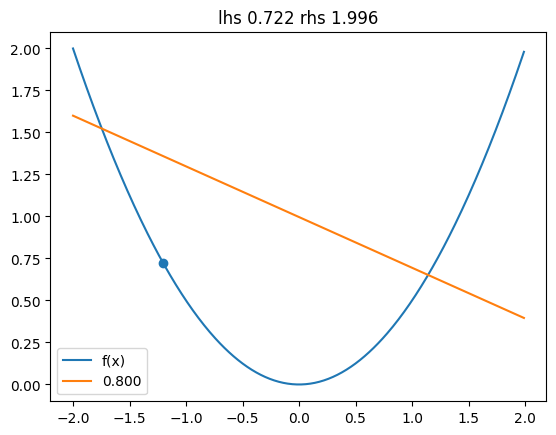

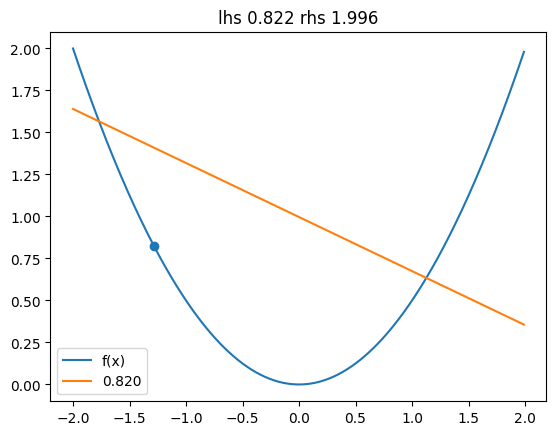

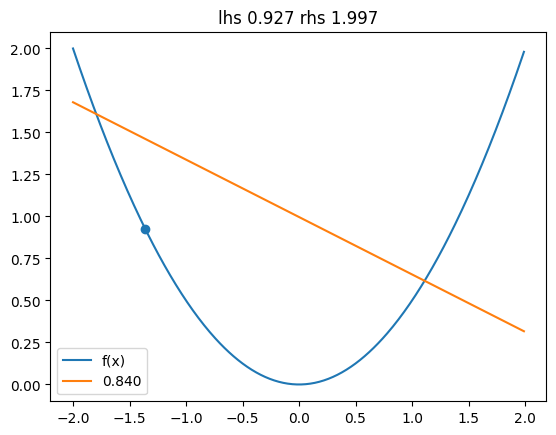

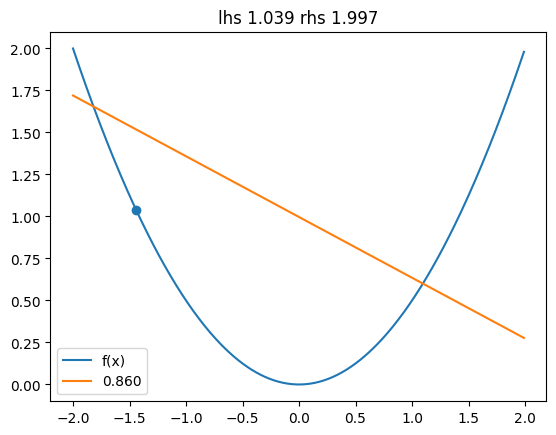

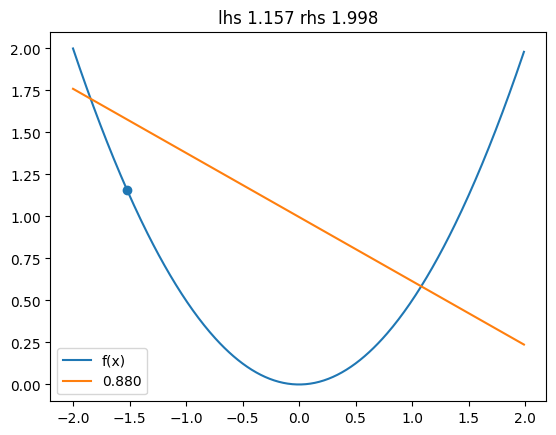

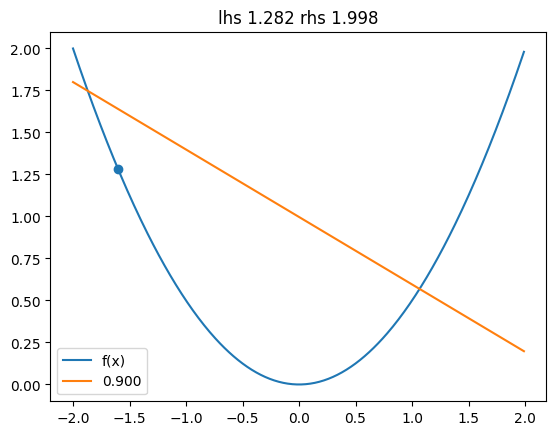

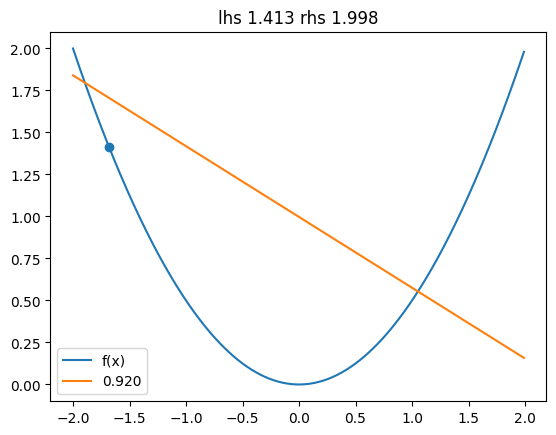

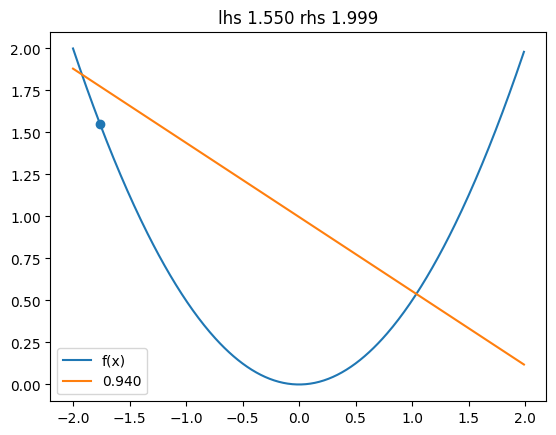

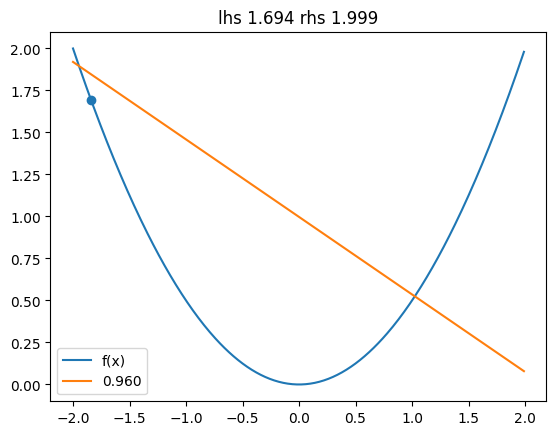

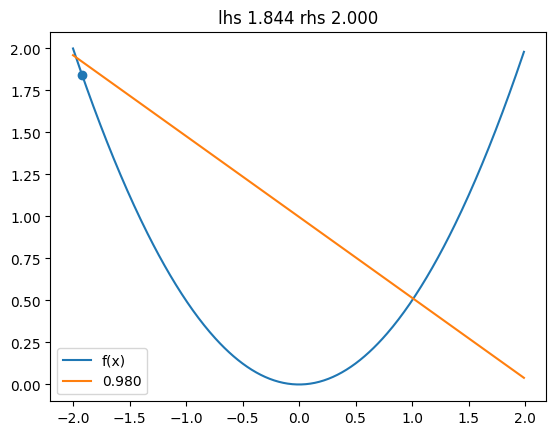

In [12]:
x = np.arange(-2, 2, 0.01)

# 세 개의 함수 중 하나를 선택해서 돌려보세요
f = lambda x: 0.5 * x ** 2
#f = lambda x: np.cos(np.pi * x)
#f = lambda x: -0.5 * x ** 4

filenames=[]
for lamda in np.arange(0, 1, 0.02):
  # LHS
  tmp_x = lamda*x[0] + (1-lamda)*x[-1]

  # RHS
  x_line, y_line = np.array([x[0], x[-1]]), np.array([lamda*f(x[0]), (1-lamda)*f(x[-1])])

  # compute LHS and RHS
  LHS = f(tmp_x)
  RHS = lamda*f(x[0]) + (1-lamda)*f(x[-1])
  if LHS > RHS:
    print('At lamda %0.3f, it is concave' % lamda)
    print('lhs %.5f rhs %.5f' % (LHS, RHS))

  plt.figure()
  # original graph
  plt.plot(x, f(x), label='f(x)')
  # plot RHS
  plt.plot(x_line, y_line, label='%0.3f' % lamda)
  # plot LHS
  plt.scatter(tmp_x, f(tmp_x))
  #title, legennd
  plt.title('lhs %.3f rhs %.3f' % (LHS, RHS))
  plt.legend()
  plt.savefig('lamda %0.3f.png' % lamda)
  # plt.close()
  filenames.append('lamda %0.3f.png' % lamda)

# Build GIF
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

## 질문 3-1: 3개의 함수를 확인할 수 있습니다. 3개의 함수중 최적화가 쉬운 함수는 무엇이고, 왜 그 함수가 최적화하기 쉬울까요?

## 답변 3-1:
- 주어진 3개 함수
    - f = lambda x: 0.5 * x ** 2
    - f = lambda x: np.cos(np.pi * x)
    - f = lambda x: -0.5 * x ** 4
    
- 주어진 3개 함수 최적화가 가장 쉬운 함수는 Convex Function인 f = lambda x: 0.5 * x ** 2 이다.
    
- 볼록 함수는 모든 지역 최적해(Local Minimum)가 동시에 전역 최적해(Global Minimum)이므로 최적화가 쉽다.

## 질문 3-2: 지역 최적해(local minimum)'와 '전역 최적해(global minimum)'의 차이점과 연관 지어, Non-convex 함수를 최적화할 때 발생할 수 있는 문제점은 무엇인지 설명해주세요.

## 답변 3-2:
- 지역 최적해와 전역 최적해의 차이점
    - Local Minimum : 특정 영역에서의 최적 값
    - Global Minimum : 전체 영역에서의 최적 값

- Non-convex 함수를 최적화하며 기울기가 0인 지점을 찾았을 때, 그것이 local minimum인지 global minimum인지 알 수 없다.
- 최적화 알고리즘이 초기 가중치에 따라 가장 낮은 손실 값을 제공하는 global Minimum 대신, 상대적으로 높은 손실을 가진 local minimum 에 갇힐 위험이 있다.

# 실습 4 : SGD Optimization

In [13]:
def make_data():
    x1 = random.randint(0, 1)
    x2 = random.randint(0, 1)
    yy = 0 if (x1 == x2) else 1

    # centered at zero
    x1 = 2. * (x1 - 0.5)
    x2 = 2. * (x2 - 0.5)
    yy = 2. * (yy - 0.5)

    # add noise
    x1 += 0.1 * random.random()
    x2 += 0.1 * random.random()
    yy += 0.1 * random.random()

    return [x1, x2, ], yy

batch_size = 30

def make_batch():

    data = [make_data() for ii in range(batch_size)]
    labels = [label for xx, label in data]
    data = [xx for xx, label in data]
    return np.array(data, dtype='float32'), np.array(labels, dtype='float32')

In [14]:
train_data = [make_batch() for ii in range(500)]
test_data = [make_batch() for ii in range(50)]

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [16]:
torch.manual_seed(42)

class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()

        self.dense1 = nn.Linear(2, 2)
        self.dense2 = nn.Linear(2, 1)

    def forward(self, x):
        x = F.tanh(self.dense1(x))
        x = self.dense2(x)
        return torch.squeeze(x)

In [17]:
# initialize our network
model = NN()

## optimizer = stochastic gradient descent
optimizer = optim.SGD(model.parameters(), lr = 0.001)


## train and test functions
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_data):
        data, target = Variable(torch.from_numpy(data)), Variable(torch.from_numpy(target))
        optimizer.zero_grad()
        output = model(data)
        loss = F.mse_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} {}\tLoss: {:.4f}'.format(epoch, batch_idx * len(data), loss.item()))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_data:
        data, target = Variable(torch.from_numpy(data), volatile=True), Variable(torch.from_numpy(target))
        output = model(data)
        test_loss += F.mse_loss(output, target)
        correct += (np.around(output.data.numpy()) == np.around(target.data.numpy())).sum()

    test_loss /= len(test_data)
    test_loss = test_loss.item()

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, batch_size * len(test_data), 100. * correct / (batch_size * len(test_data))) )

In [18]:
## run experiment
nepochs = 100
lr = 0.001

print('lr=', lr)
for epoch in range(1, nepochs + 1):
    train(epoch)
    print('---------------------------------------------')
    test()

lr= 0.001
Train Epoch: 1 0	Loss: 1.7980
Train Epoch: 1 3000	Loss: 1.0724
Train Epoch: 1 6000	Loss: 1.2815
Train Epoch: 1 9000	Loss: 1.1247
Train Epoch: 1 12000	Loss: 1.1884
---------------------------------------------


/tmp/ipython-input-1873497844.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(torch.from_numpy(data), volatile=True), Variable(torch.from_numpy(target))



Test set: Average loss: 1.0345, Accuracy: 0/1500 (0.00%)

Train Epoch: 2 0	Loss: 1.1739
Train Epoch: 2 3000	Loss: 0.9428
Train Epoch: 2 6000	Loss: 1.0461
Train Epoch: 2 9000	Loss: 0.9813
Train Epoch: 2 12000	Loss: 1.0587
---------------------------------------------

Test set: Average loss: 0.9807, Accuracy: 0/1500 (0.00%)

Train Epoch: 3 0	Loss: 1.0414
Train Epoch: 3 3000	Loss: 0.9396
Train Epoch: 3 6000	Loss: 0.9840
Train Epoch: 3 9000	Loss: 0.9381
Train Epoch: 3 12000	Loss: 1.0232
---------------------------------------------

Test set: Average loss: 0.9565, Accuracy: 0/1500 (0.00%)

Train Epoch: 4 0	Loss: 0.9918
Train Epoch: 4 3000	Loss: 0.9278
Train Epoch: 4 6000	Loss: 0.9479
Train Epoch: 4 9000	Loss: 0.9057
Train Epoch: 4 12000	Loss: 1.0057
---------------------------------------------

Test set: Average loss: 0.9315, Accuracy: 0/1500 (0.00%)

Train Epoch: 5 0	Loss: 0.9597
Train Epoch: 5 3000	Loss: 0.9040
Train Epoch: 5 6000	Loss: 0.9149
Train Epoch: 5 9000	Loss: 0.8710
Train Ep

## 실습 4: lr값을 다음 4개의 값으로 돌려보고, 어떤 value가 왜 적절한지 설명해주세요. lr값을 다음 4개의 값으로 돌려보고, 어떤 value가 왜 적절한지 설명해주세요. lr = [0,0001, 0.001, 0.01, 0.1]

## 답변 4  
- `[0.0001, 0.001, 0.01, 0.1]` 네 가지 학습률 값을 직접 실험해보고 모델의 성능에 미치는 영향을 분석하여 가장 적절한 값을 선택해보았다.
- **Learning Rate**값이 너무 큰 경우 속도는 빠르지만 최적값을 정확히 찾지 못하고 범위를 넘어가
모델 학습이 실패하는 문제가 발생했다.
- 반대로 **Learning Rate**값이 너무 작은 경우 많은 케이스를 고려해야하므로 속도가 너무 느려지는 문제가 발생했다.
- 테스트 결과 속도와 모델의 정확성에 0.001 값이 가장 적절했다.

# 실습 5: Sigmoid Function

In [19]:
f = lambda x, w, b: 1/(1 + np.exp(-(w*x + b)))

x = np.arange(-10, 10, 0.01).reshape([-1, 1])

# effect of weight on sigmoid function
filenames = []
for i in np.arange(1, 5, 0.1):
  w = np.ones([1, 1]) * i * 0.5
  b = np.ones([1, 1]) * 0

  plt.plot(x, f(x, w, b))
  plt.title('w = %0.1f' % i)
  plt.grid()
  plt.savefig('w %0.1f.png' % i)
  plt.close()
  filenames.append('w %0.1f.png' % i)

# Build GIF
with imageio.get_writer('w_mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)


In [20]:
f = lambda x, w, b: 1/(1 + np.exp(-(w*x + b)))

x = np.arange(-10, 10, 0.01).reshape([-1, 1])

# effect of bias on sigmoid function
filenames = []
for i in np.arange(1, 5, 0.1):
  w = np.ones([1, 1])
  b = np.ones([1, 1])* i

  plt.plot(x, f(x, w, b))
  plt.title('b = %0.1f' % i)
  plt.grid()
  plt.savefig('b %0.1f.png' % i)
  plt.close()
  filenames.append('b %0.1f.png' % i)

# Build GIF
with imageio.get_writer('b_mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# 실습 6: Logistic Regression

In [21]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [22]:
input_size = 28 * 28  # 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [23]:
train_dataset = torchvision.datasets.MNIST(root='../../data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data',
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 37.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.02MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.47MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.88MB/s]


Dataset MNIST
    Number of datapoints: 60000
    Root location: ../../data
    Split: Train
    StandardTransform
Transform: ToTensor()
----------------
Dataset MNIST
    Number of datapoints: 10000
    Root location: ../../data
    Split: Test
    StandardTransform
Transform: ToTensor()

training data shape:  torch.Size([60000, 28, 28])


/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


Text(0.5, 1.0, 'n = 3280 label = 4')

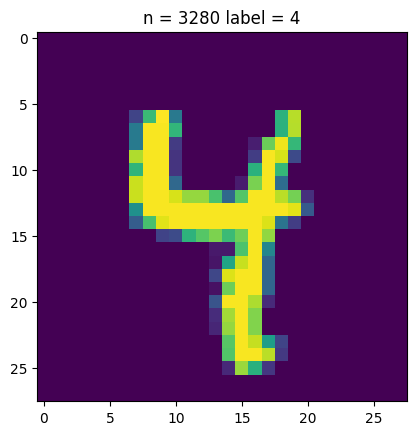

In [24]:
# 2.3.1 Check data
print(train_dataset)
print('----------------')
print(test_dataset)
print()

import matplotlib.pyplot as plt
print('training data shape: ', train_dataset.data.shape)
n = np.random.randint(0, 60000)
plt.imshow(train_dataset.data[n])
plt.title(f'n = %d label = %d' % (n, train_dataset.train_labels[n].numpy()))

In [25]:
#2.4 Logistic regression model
model = nn.Linear(input_size, num_classes)

#2.5 Cross Entropy Loss
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()

#2.6 Optimizer Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#2.7 Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/600], Loss: 2.2012
Epoch [1/5], Step [200/600], Loss: 2.1062
Epoch [1/5], Step [300/600], Loss: 2.0059
Epoch [1/5], Step [400/600], Loss: 1.9329
Epoch [1/5], Step [500/600], Loss: 1.8637
Epoch [1/5], Step [600/600], Loss: 1.7757
Epoch [2/5], Step [100/600], Loss: 1.7562
Epoch [2/5], Step [200/600], Loss: 1.6472
Epoch [2/5], Step [300/600], Loss: 1.6535
Epoch [2/5], Step [400/600], Loss: 1.5377
Epoch [2/5], Step [500/600], Loss: 1.4737
Epoch [2/5], Step [600/600], Loss: 1.4446
Epoch [3/5], Step [100/600], Loss: 1.3987
Epoch [3/5], Step [200/600], Loss: 1.4378
Epoch [3/5], Step [300/600], Loss: 1.3605
Epoch [3/5], Step [400/600], Loss: 1.3800
Epoch [3/5], Step [500/600], Loss: 1.2996
Epoch [3/5], Step [600/600], Loss: 1.2809
Epoch [4/5], Step [100/600], Loss: 1.2575
Epoch [4/5], Step [200/600], Loss: 1.2173
Epoch [4/5], Step [300/600], Loss: 1.1297
Epoch [4/5], Step [400/600], Loss: 1.1269
Epoch [4/5], Step [500/600], Loss: 1.1469
Epoch [4/5], Step [600/600], Loss:

In [26]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the model on the 10000 test images: 83.12000274658203 %


## 코드 구현 6-1 : 아래 log_softmax함수를 구현하세요.

In [27]:
class custom_CrossEntropyLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(custom_CrossEntropyLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        num_examples = targets.shape[0]
        batch_size = inputs.shape[0]
        softmax_outputs = self.log_softmax(inputs)
        outputs = softmax_outputs[range(batch_size), targets]
        return -torch.sum(outputs)/num_examples

    @staticmethod
    def log_softmax(x):
        exp_x = torch.exp(x)
        sum_exp_x = torch.sum(exp_x, dim=1, keepdim=True)
        return torch.log(exp_x / sum_exp_x)

In [28]:
#2.4 Logistic regression model
model = nn.Linear(input_size, num_classes)

#2.5 Cross Entropy Loss
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()

#2.6 Optimizer Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#2.7 Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 2.2172
Epoch [1/5], Step [200/600], Loss: 2.1365
Epoch [1/5], Step [300/600], Loss: 2.0821
Epoch [1/5], Step [400/600], Loss: 1.9401
Epoch [1/5], Step [500/600], Loss: 1.8756
Epoch [1/5], Step [600/600], Loss: 1.7805
Epoch [2/5], Step [100/600], Loss: 1.7204
Epoch [2/5], Step [200/600], Loss: 1.6520
Epoch [2/5], Step [300/600], Loss: 1.5849
Epoch [2/5], Step [400/600], Loss: 1.5461
Epoch [2/5], Step [500/600], Loss: 1.4994
Epoch [2/5], Step [600/600], Loss: 1.3967
Epoch [3/5], Step [100/600], Loss: 1.3905
Epoch [3/5], Step [200/600], Loss: 1.3352
Epoch [3/5], Step [300/600], Loss: 1.3418
Epoch [3/5], Step [400/600], Loss: 1.3789
Epoch [3/5], Step [500/600], Loss: 1.2761
Epoch [3/5], Step [600/600], Loss: 1.2311
Epoch [4/5], Step [100/600], Loss: 1.2660
Epoch [4/5], Step [200/600], Loss: 1.2898
Epoch [4/5], Step [300/600], Loss: 1.1391
Epoch [4/5], Step [400/600], Loss: 1.1485
Epoch [4/5], Step [500/600], Loss: 1.0872
Epoch [4/5], Step [600/600], Loss:

In [29]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the model on the 10000 test images: 83.06999969482422 %


## 질문 6 : 다중 분류 문제에서는 왜 sigmoid를 사용하지 못하고 softmax를 사용하게 될까요?

## 답변 6
- Sigmoid는 각 출력(클래스)에 대해 독립적으로 확률을 계산한다.
즉 모델이 훈련 과정에서 정답이 아닌 클래스에도 높은 확률을 부여하는 것을 막지 못한다.
- Softmax 함수는 클래스 간의 상대적인 경쟁을 유도하여 확률의 합을 항상 1이 되도록 정규화한다.
- 단일 분류 모델에서는 하나의 클래스의 확률만 알아도 확률이 낮다면 다른 클래스를 선택하도록 sigmoid로 모델 구현이 가능하지만, 다중 분류 모델에서는 모든 클래스에 대한 확률을 배타적으로 비교하는 softmax를 사용해야한다.
